In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [16]:
df = pd.read_csv("Zomato data .csv")
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [17]:
def fix_rate(value):
    value = str(value).split("/")
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(fix_rate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [18]:
df.info() #no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Restaurant Types')

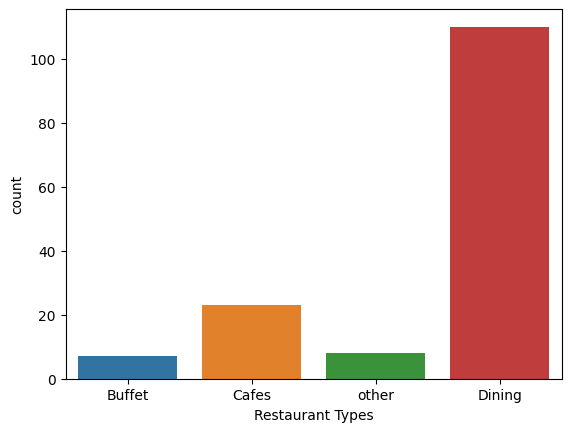

In [19]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel("Restaurant Types")

Text(0, 0.5, 'Votes')

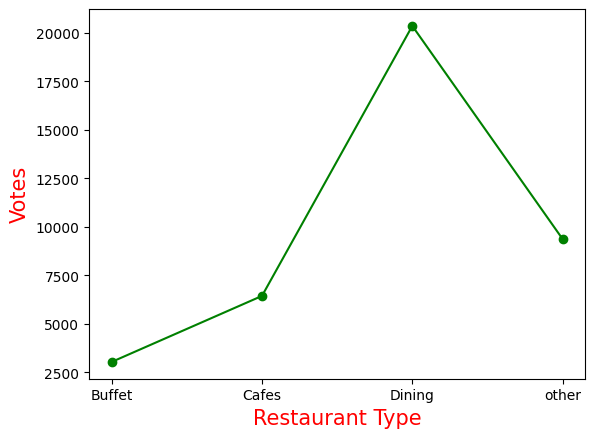

In [32]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data }) #grouped_data is a series
plt.plot(result, c="green",marker="o") 
plt.xlabel("Restaurant Type", c="Red", size = 15)
plt.ylabel("Votes", c="Red",size = 15)


In [26]:
max_votes = df['votes'].max()
restaurant_max_votes = df.loc[df['votes'] == max_votes ,'name'] #arg : fun , list , column name 
print("Restaurants with Maximum Votes:")
print(restaurant_max_votes)


Restaurants with Maximum Votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

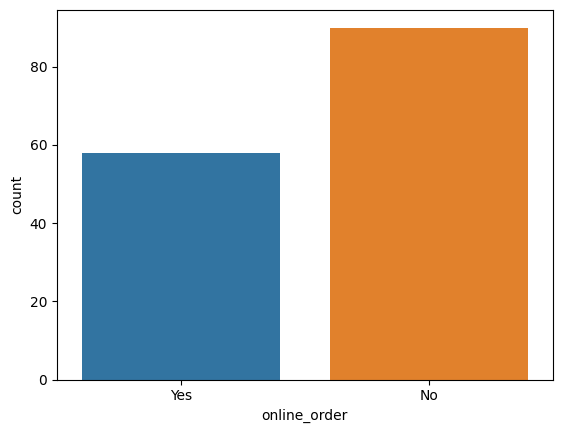

In [28]:
sns.countplot(x = df['online_order'])

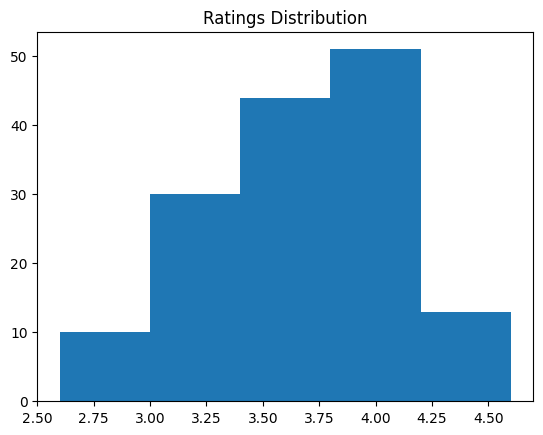

In [30]:
plt.hist(df['rate'],bins =5)
plt.title("Ratings Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

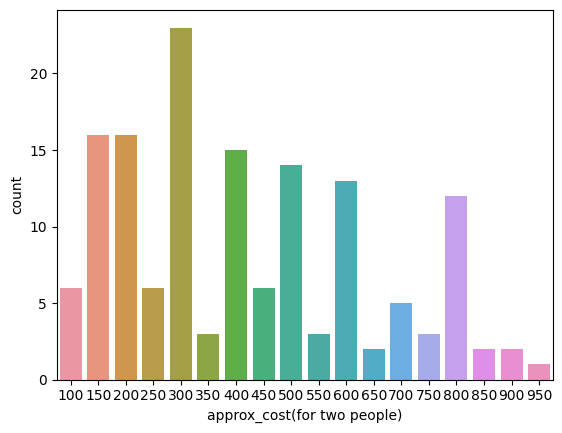

In [33]:
couple_data =df['approx_cost(for two people)']
sns.countplot(x = couple_data) #argument : a variable

<Axes: xlabel='online_order', ylabel='rate'>

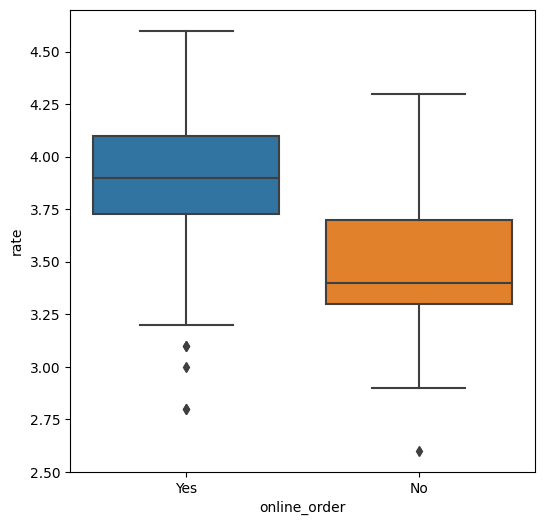

In [38]:
plt.figure(figsize = (6,6))
sns.boxplot(x ='online_order', y ='rate',data =df)

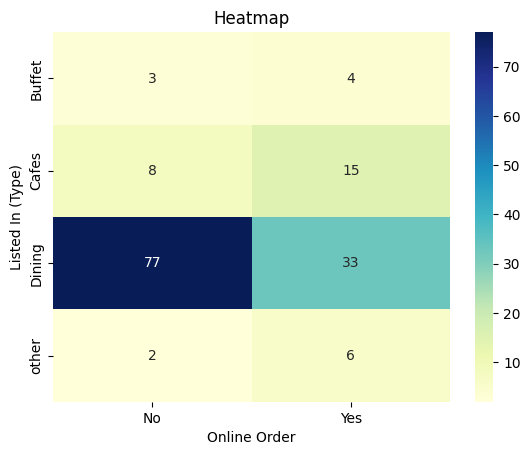

In [36]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


This has concluded that Dining restaurants have high offline orders.While , Cafes have high online orders.